In [168]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
# Make data
cities = ['Tijuana','Las Vegas','Los Angeles','Anaheim','Atlantis']
occupations = ['Doctor','Lawyer','Engineer','Drone security officer']
bloodtypes = ['A','B','AB','O']
df = pd.DataFrame({'City': np.random.choice(cities,500),
                   'Occupation': np.random.choice(occupations,500),
                   'Blood Type':np.random.choice(bloodtypes,500)})

In [3]:
# Make a dummy column, otherwise the groupby returns an empty df
df['Dummy'] = np.ones(500)

In [229]:
# This is now what I'd like to plot
grouped = df.groupby(by=['City','Occupation','Blood Type']).count().unstack()

In [228]:
# List of blood types, to use later as categories in subplots
kinds = grouped.columns.levels[1]

In [227]:
# colors for bar graph
colors = [get_cmap('viridis')(v) for v in np.linspace(0,1,len(kinds))]

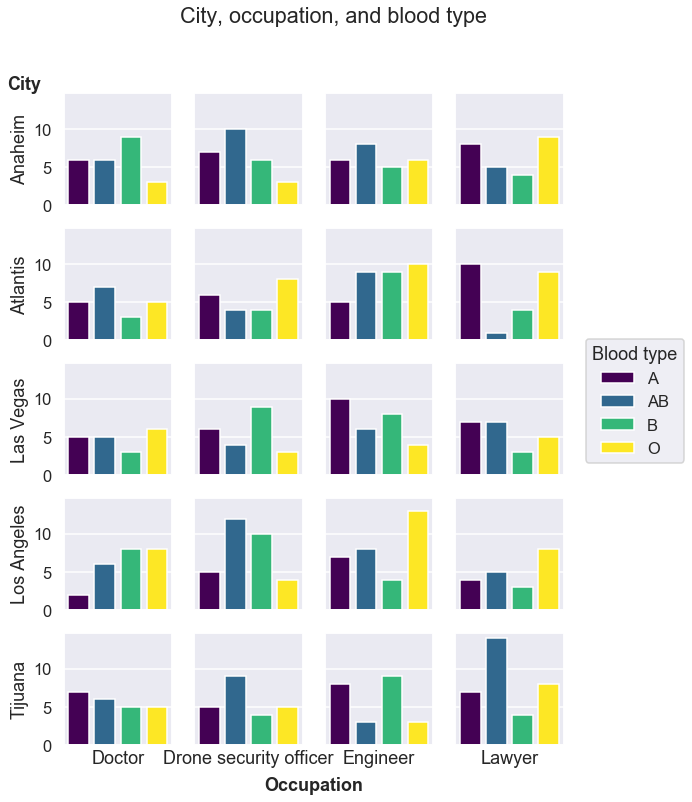

In [307]:
sns.set(context="talk")
nxplots = len(grouped.index.levels[0])
nyplots = len(grouped.index.levels[1])
fig, axes = plt.subplots(nxplots,
                         nyplots,
                         sharey=True,
                         sharex=True,
                         figsize=(10,12))

fig.suptitle('City, occupation, and blood type')

# plot the data
for a, b in enumerate(grouped.index.levels[0]):
    for i, j in enumerate(grouped.index.levels[1]):
        axes[a,i].bar(kinds,grouped.loc[b,j],color=colors)
        axes[a,i].xaxis.set_ticks([])
        
axeslabels = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
axeslabels.set_ylabel('City',rotation='horizontal',y=1,weight="bold")
axeslabels.set_xlabel('Occupation',weight="bold")

# x- and y-axis labels
for i, j in enumerate(grouped.index.levels[1]):
    axes[nyplots,i].set_xlabel(j)
for i, j in enumerate(grouped.index.levels[0]):
    axes[i,0].set_ylabel(j)

# Tune this manually to make room for the legend
fig.subplots_adjust(right=0.82)

fig.legend([Patch(facecolor = i) for i in colors],
           kinds,
           title="Blood type",
           loc="center right")

In [167]:
list(zip(colors,kinds))

[((0.267004, 0.004874, 0.329415, 1.0), 'A'),
 ((0.190631, 0.407061, 0.556089, 1.0), 'AB'),
 ((0.20803, 0.718701, 0.472873, 1.0), 'B'),
 ((0.993248, 0.906157, 0.143936, 1.0), 'O')]

In [174]:
[Patch(facecolor = i[0], label = i[1]) for i in zip(colors,kinds)]

In [173]:
for i in zip(colors,kinds):
    print(i[0])

(0.267004, 0.004874, 0.329415, 1.0)
(0.190631, 0.407061, 0.556089, 1.0)
(0.20803, 0.718701, 0.472873, 1.0)
(0.993248, 0.906157, 0.143936, 1.0)
